# Preference structures

First we configure the notebook so we can use auto-completion.

In [1]:
%config Completer.use_jedi = False

Then we can import all relations utilities.

In [2]:
from pandas import Series
from mcda.relations import *
from mcda.matrices import *
from mcda.values import CommensurableValues

## Relations

In the package, a relation `aXb` is defined by a `Relation` instance:
* the first element of the relation `a`
* the second element of the relation `b`
* the relation type `X` (`P`, `I`, `R`) which is the `Relation` class chosen

So you can easily create relations and bundle them in a list:

In [3]:
relations0 = [P(0, 1), R(0, 1), I(0, 0)]

Relation's validity w.r.t the reflexivity property of their relation type are checked on instanciation:

In [4]:
try:
    P(0, 0)
except ValueError as e:
    print(repr(e))

ValueError('Preference relations are irreflexive: 0 == 0')


## Relations comparisons

### Compare relations elements pairs

In [5]:
relations0[0].same_elements(relations0[1])

True

### Equality

Two relations are equal if they have the same relation type, and same meaning (w.r.t the relation type symmetry property).

In [6]:
P(1, 0) == P(1, 0)

True

Indifference and incomparable relations are symmetric.

In [7]:
I(1, 0) == I(0, 1)

True

In [8]:
R(1, 0) == R(0, 1)

True

Preference relations though are antisymmetric.

In [9]:
P(1, 0) == P(0, 1)

False

Of course relations that don't involve the same elements cannot be equal.

In [10]:
I(1, 0) == I(0, 2)

False

### Compatibility of relations

We can check if two relations are compatible i.e their union can coexist.

This is the case if they don't involve the same pair of elements.

In [11]:
P(0, 1).compatible(P(0, 2))

True

But also if they are equal (they are redundant but compatible).

In [12]:
P(0, 1).compatible(P(0, 1))

True

In [13]:
I(1, 0).compatible(I(0, 1))

True

Two different relations on the same elements pair are incompatible.

In [14]:
P(0, 1).compatible(I(1, 0))

False

In [15]:
P(1, 0).compatible(P(0, 1))

False

## Preference structure

We can simply create a relations structure by bundling all relations in a list.

In [16]:
relations = PreferenceStructure(
    [
        I(1, 0),
        P(0, 2),
        P(2, 4),
        I(4, 3),
        P(4, 5),
        R(5, 6),
    ]
)

You can also create a preference structure by adding relations together:

In [17]:
relations1 = I(1, 0)
relations1 += P(0, 2)
relations1 += P(2, 4)
relations1 += I(4, 3)
relations1 += P(4, 5)
relations1 += I(5, 6)
relations1

PreferenceStructure([IndifferenceRelation(1, 0), PreferenceRelation(0, 2), PreferenceRelation(2, 4), IndifferenceRelation(4, 3), PreferenceRelation(4, 5), IndifferenceRelation(5, 6)])

Upon instanciation, invalid preference structure will raise an error:

In [18]:
try:
    PreferenceStructure(
        [
            I(1, 0),
            P(0, 2),
            P(2, 4),
            I(4, 3),
            P(4, 5),
            R(0, 1),
        ]
    )
except ValueError as e:
    print(repr(e))

ValueError('incompatible relations: 1 I 0, 0 R 1')


In [19]:
try:
    relations + R(0, 1)
except ValueError as e:
    print(repr(e))

ValueError('incompatible relations: 1 I 0, 0 R 1')


We can iterate over the relations in a preference structure:

In [20]:
for r in relations:
    print(r)

1 I 0
0 P 2
2 P 4
4 I 3
4 P 5
5 R 6


In [21]:
rc = relations.copy()
rc -= relations.typed_structures[R]
rc

PreferenceStructure([IndifferenceRelation(1, 0), PreferenceRelation(0, 2), PreferenceRelation(2, 4), IndifferenceRelation(4, 3), PreferenceRelation(4, 5)])

In [22]:
rc + R(5, 6)

PreferenceStructure([IndifferenceRelation(1, 0), PreferenceRelation(0, 2), PreferenceRelation(2, 4), IndifferenceRelation(4, 3), PreferenceRelation(4, 5), IncomparableRelation(5, 6)])

We can plot the relations:

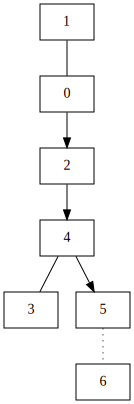

In [23]:
relations.plot()

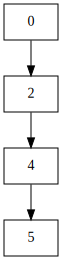

In [24]:
relations.typed_structures[P].plot()

### Relation membership

In [25]:
I(0, 1) in relations

True

### Elements list

In [26]:
relations.elements

[0, 1, 2, 3, 4, 5, 6]

### Relation between elements (if existing)

In [27]:
relations.elements_pairs_relations[(0, 2)]

PreferenceRelation(0, 2)

In [28]:
relations.elements_pairs_relations[(7, 1)]

### Relations of an element

In [29]:
relations.elements_structures[4]

PreferenceStructure([PreferenceRelation(4, 5), PreferenceRelation(2, 4), IndifferenceRelation(4, 3)])

### Typed relations

In [30]:
relations.typed_structures[P]

PreferenceStructure([PreferenceRelation(4, 5), PreferenceRelation(0, 2), PreferenceRelation(2, 4)])

In [31]:
relations.substructure(types=[P, I])

PreferenceStructure([IndifferenceRelation(1, 0), PreferenceRelation(0, 2), PreferenceRelation(2, 4), IndifferenceRelation(4, 3), PreferenceRelation(4, 5)])

### Check if relations define a total preorder

In [32]:
relations.is_total_preorder

False

In [33]:
relations1 = PreferenceStructure([
    I(1, 0),
    P(0, 2),
    P(2, 4),
    I(4, 3),
    P(4, 5),
])

In [34]:
relations1.is_total_preorder

True

### Check if relations define a total order

In [35]:
relations1.is_total_order

False

In [36]:
relations1 = PreferenceStructure([P(0, 2), P(2, 4), P(4, 5)])
relations1.is_total_order

True

In [37]:
relations1 = PreferenceStructure([
    I(1, 0),
    P(0, 2),
    I(4, 3),
    P(4, 5),
])
relations1.is_total_order

False

### Add all transitive relations

In [38]:
res = relations.transitive_closure
res

PreferenceStructure([IndifferenceRelation(0, 1), PreferenceRelation(0, 2), PreferenceRelation(0, 3), PreferenceRelation(0, 4), PreferenceRelation(0, 5), IncomparableRelation(0, 6), PreferenceRelation(1, 2), PreferenceRelation(1, 3), PreferenceRelation(1, 4), PreferenceRelation(1, 5), IncomparableRelation(1, 6), PreferenceRelation(2, 3), PreferenceRelation(2, 4), PreferenceRelation(2, 5), IncomparableRelation(2, 6), IndifferenceRelation(3, 4), PreferenceRelation(3, 5), IncomparableRelation(3, 6), IncomparableRelation(4, 6), IncomparableRelation(5, 6), PreferenceRelation(4, 5)])

### Remove all transitive relations

This function actually computes a condensed graph from the relations list, the compute transitive reduction on it.

**This means the elements of the relation structure could be bundled together in categories!**

In [39]:
res.transitive_reduction

PreferenceStructure([IncomparableRelation((0, 1), (6,)), IncomparableRelation((5,), (0, 1)), PreferenceRelation((0, 1), (2,)), IncomparableRelation((3, 4), (0, 1)), IncomparableRelation((3, 4), (6,)), IncomparableRelation((5,), (6,)), PreferenceRelation((2,), (3, 4)), IncomparableRelation((2,), (6,)), IncomparableRelation((5,), (2,)), PreferenceRelation((3, 4), (5,))])

## Outranking matrices

We can convert the relations list to an outranking matrix.

In [40]:
mat = relations.outranking_matrix
mat.data

0  1  2  3  4  5  6
0  1  1  1  0  0  0  0
1  1  1  0  0  0  0  0
2  0  0  1  0  1  0  0
3  0  0  0  1  1  0  0
4  0  0  0  1  1  1  0
5  0  0  0  0  0  1  0
6  0  0  0  0  0  0  1

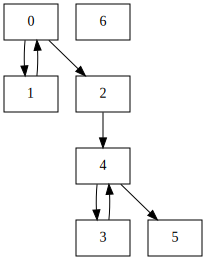

In [41]:
mat.plot()

We can of course convert back:

In [42]:
PreferenceStructure.from_outranking_matrix(mat)

PreferenceStructure([IndifferenceRelation(0, 1), PreferenceRelation(0, 2), IncomparableRelation(0, 3), IncomparableRelation(0, 4), IncomparableRelation(0, 5), IncomparableRelation(0, 6), IncomparableRelation(1, 2), IncomparableRelation(1, 3), IncomparableRelation(1, 4), IncomparableRelation(1, 5), IncomparableRelation(1, 6), IncomparableRelation(2, 3), PreferenceRelation(2, 4), IncomparableRelation(2, 5), IncomparableRelation(2, 6), IndifferenceRelation(3, 4), IncomparableRelation(3, 5), IncomparableRelation(3, 6), IncomparableRelation(4, 6), IncomparableRelation(5, 6), PreferenceRelation(4, 5)])

An outranking matrix cannot contain non-binary values:

In [43]:
try:
    create_outranking_matrix([[0, 1],[1, -2]])
except TypeError as e:
    print(str(e))

<class 'mcda.core.scales.BinaryScale'> can only fit binary data


### Transitive closure

We can compute the transitive closure of the graph represented by the matrix.

In [44]:
trans_mat = mat.transitive_closure
trans_mat.data

0  1  2  3  4  5  6
0  1  1  1  1  1  1  0
1  1  1  1  1  1  1  0
2  0  0  1  1  1  1  0
3  0  0  0  1  1  1  0
4  0  0  0  1  1  1  0
5  0  0  0  0  0  1  0
6  0  0  0  0  0  0  1

In [45]:
trans_mat.plot()

### Transitive reduction

We can compute the transitive reduction of the matrix. This is the general version of the function that makes no assumptions on the graph (cyclic graphs are accepted). However to remove potential cycles, elements may be bundled together to obtain an acyclic graph in the end.

In [46]:
new_matrix = trans_mat.transitive_reduction
new_matrix.data

(5,)  (3, 4)  (2,)  (0, 1)  (6,)
(5,)       0       0     0       0     0
(3, 4)     1       0     0       0     0
(2,)       0       1     0       0     0
(0, 1)     0       0     1       0     0
(6,)       0       0     0       0     0

In [47]:
new_matrix.plot()

We can convert back to see what relations it represents (note the presence of incomparable relations though they are redundant in the traditional model).

In [48]:
PreferenceStructure.from_outranking_matrix(new_matrix)

PreferenceStructure([IncomparableRelation((0, 1), (6,)), IncomparableRelation((5,), (0, 1)), PreferenceRelation((0, 1), (2,)), IncomparableRelation((3, 4), (0, 1)), IncomparableRelation((3, 4), (6,)), IncomparableRelation((5,), (6,)), PreferenceRelation((2,), (3, 4)), IncomparableRelation((2,), (6,)), IncomparableRelation((5,), (2,)), PreferenceRelation((3, 4), (5,))])

We can plot the relations to see how it looks.

In [49]:
PreferenceStructure.from_outranking_matrix(new_matrix).plot()

If we need to, we can replace the indexes of the outranking matrix by single labels that concatenate the labels of the elements in each category:

In [50]:
categories = dict(
    (", ".join([str(a) for a in cat]), cat) for cat in new_matrix.vertices
)
categories

{'5': (5,), '3, 4': (3, 4), '2': (2,), '0, 1': (0, 1), '6': (6,)}

In [51]:
new_matrix.data.index = categories.keys()
new_matrix.data.columns = categories.keys()
new_matrix.data

5  3, 4  2  0, 1  6
5     0     0  0     0  0
3, 4  1     0  0     0  0
2     0     1  0     0  0
0, 1  0     0  1     0  0
6     0     0  0     0  0

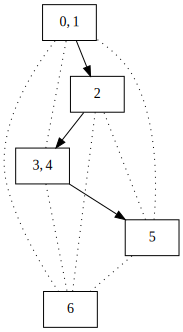

In [52]:
PreferenceStructure.from_outranking_matrix(new_matrix).plot()

### Kernel

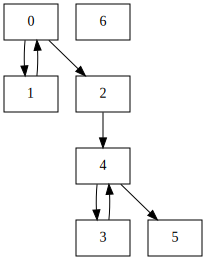

In [53]:
mat.plot()

There is no kernel in this graph (as the only stable set of alternative is `{6}` but it is not dominant). Indeed if 0 and 1 appears as good candidates, they outrank each other and are rejected from the kernel.

In [54]:
mat.kernel

[]

We can solve this problem by removing cycles inside the graph, that way it becomes a directed acyclic graph and those are guaranteed to present a kernel.

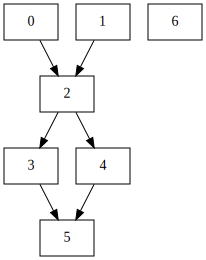

In [55]:
mat.cycle_reduction_matrix.plot()

In [56]:
mat.cycle_reduction_matrix.kernel

[0, 1, 3, 4, 6]

If we assume the transitivity of outranking relation, this makes little sense to consider alternatives 3 and 4 as dominant as they are dominated by alternative 2 itself dominated by two kernel alternatives (0 and 1).
We can then apply transitive closure to add this information about the transitivity of the relation.

**N.B: when applying both cycle reduction and transitive closure, you can apply them in any order**

In [57]:
mat.cycle_reduction_matrix.transitive_closure.plot()

In [58]:
mat.transitive_closure.cycle_reduction_matrix.plot()

In [59]:
mat.cycle_reduction_matrix.transitive_closure.kernel

[0, 1, 6]

## Ranking

We can also convert ranking into a preference structure:

In [60]:
PreferenceStructure.from_ranking(
    CommensurableValues(
        Series({
            0: 1,
            1: 1,
            2: 2,
            3: 3
        })
    )
)

PreferenceStructure([IndifferenceRelation(0, 1), PreferenceRelation(2, 0), PreferenceRelation(2, 1), PreferenceRelation(3, 0), PreferenceRelation(3, 1), PreferenceRelation(3, 2)])

## Sort relations

There can be multiple ways to sort relations in a structure.

In [61]:
from mcda.set_functions import HashableSet

### Lexicographic order

In [62]:
alts = sorted(res.elements)
alts

[0, 1, 2, 3, 4, 5, 6]

In [63]:
from itertools import product

In [64]:
sets = [(a, b) for a, b in product(alts, alts)]

In [65]:
sorted(
    res, 
    key=lambda r: (
        sets.index(r.elements)
    )
)

[IndifferenceRelation(0, 1),
 PreferenceRelation(0, 2),
 PreferenceRelation(0, 3),
 PreferenceRelation(0, 4),
 PreferenceRelation(0, 5),
 IncomparableRelation(0, 6),
 PreferenceRelation(1, 2),
 PreferenceRelation(1, 3),
 PreferenceRelation(1, 4),
 PreferenceRelation(1, 5),
 IncomparableRelation(1, 6),
 PreferenceRelation(2, 3),
 PreferenceRelation(2, 4),
 PreferenceRelation(2, 5),
 IncomparableRelation(2, 6),
 IndifferenceRelation(3, 4),
 PreferenceRelation(3, 5),
 IncomparableRelation(3, 6),
 PreferenceRelation(4, 5),
 IncomparableRelation(4, 6),
 IncomparableRelation(5, 6)]

### Cardinality of its elements

In [66]:
sets = [s for s in HashableSet.natural_order(alts)]

In [67]:
sorted(
    res, 
    key=lambda r: (
        sets.index(
            HashableSet(r.elements)
        )
    )
)

[IndifferenceRelation(0, 1),
 PreferenceRelation(0, 2),
 PreferenceRelation(0, 3),
 PreferenceRelation(0, 4),
 PreferenceRelation(0, 5),
 IncomparableRelation(0, 6),
 PreferenceRelation(1, 2),
 PreferenceRelation(1, 3),
 PreferenceRelation(1, 4),
 PreferenceRelation(1, 5),
 IncomparableRelation(1, 6),
 PreferenceRelation(2, 3),
 PreferenceRelation(2, 4),
 PreferenceRelation(2, 5),
 IncomparableRelation(2, 6),
 IndifferenceRelation(3, 4),
 PreferenceRelation(3, 5),
 IncomparableRelation(3, 6),
 PreferenceRelation(4, 5),
 IncomparableRelation(4, 6),
 IncomparableRelation(5, 6)]

### Relation type and cardinality of elements

In [68]:
order = [P, I, R]
sorted(
    res, 
    key=lambda r: (
        order.index(r.__class__),
        sets.index(
            HashableSet(r.elements)
        )
    )
)

[PreferenceRelation(0, 2),
 PreferenceRelation(0, 3),
 PreferenceRelation(0, 4),
 PreferenceRelation(0, 5),
 PreferenceRelation(1, 2),
 PreferenceRelation(1, 3),
 PreferenceRelation(1, 4),
 PreferenceRelation(1, 5),
 PreferenceRelation(2, 3),
 PreferenceRelation(2, 4),
 PreferenceRelation(2, 5),
 PreferenceRelation(3, 5),
 PreferenceRelation(4, 5),
 IndifferenceRelation(0, 1),
 IndifferenceRelation(3, 4),
 IncomparableRelation(0, 6),
 IncomparableRelation(1, 6),
 IncomparableRelation(2, 6),
 IncomparableRelation(3, 6),
 IncomparableRelation(4, 6),
 IncomparableRelation(5, 6)]

### Elements pair order (as binary mask)

In [69]:
sets = [HashableSet.from_index(s, alts) for s in range(2**len(alts))]
sorted(
    res, 
    key=lambda r: (
        sets.index(
            set(r.elements)
        )
    )
)

[IndifferenceRelation(0, 1),
 PreferenceRelation(0, 2),
 PreferenceRelation(1, 2),
 PreferenceRelation(0, 3),
 PreferenceRelation(1, 3),
 PreferenceRelation(2, 3),
 PreferenceRelation(0, 4),
 PreferenceRelation(1, 4),
 PreferenceRelation(2, 4),
 IndifferenceRelation(3, 4),
 PreferenceRelation(0, 5),
 PreferenceRelation(1, 5),
 PreferenceRelation(2, 5),
 PreferenceRelation(3, 5),
 PreferenceRelation(4, 5),
 IncomparableRelation(0, 6),
 IncomparableRelation(1, 6),
 IncomparableRelation(2, 6),
 IncomparableRelation(3, 6),
 IncomparableRelation(4, 6),
 IncomparableRelation(5, 6)]